# Spam SMS Detection

In [ ]:
'''Build an AI model that can classify SMS messages as spam or
 legitimate. Use techniques like TF-IDF or word embeddings with
 classifiers like Naive Bayes, Logistic Regression, or Support Vector
 Machines to identify spam messages'''

In [13]:
# importing required libraries andpackages
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
# Loading the dataset
data = pd.read_csv('spam.csv', encoding = 'latin-1')

In [15]:
# Dropp the unnecessary columns and rename
data = data[['v1','v2']]
data.columns = ['label', 'message']

In [16]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [17]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.2, random_state = 42)

In [18]:
# Extracting the features using TF-IDF and fiting and transforming the data
tfidf = TfidfVectorizer(stop_words = 'english')
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [20]:
# Training the model by Naive Bayes Classifier
navie_bayes = MultinomialNB()
navie_bayes.fit(x_train_tfidf, y_train)

MultinomialNB()

In [21]:
# Predicting and evaluating the model
y_pred = navie_bayes.predict(x_test_tfidf)
print("Navie Bayes Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Navie Bayes Accuracy:  0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [23]:
# Training the model by Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_tfidf, y_train)

LogisticRegression()

In [25]:
# Predicting the model
y_pred = logistic_regression.predict(x_test_tfidf)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [26]:
# Training the model by Support Vector Machine
svm = SVC()
svm.fit(x_train_tfidf, y_train)

SVC()

In [27]:
# Predicting the model and evaluting
y_pred = svm.predict(x_test_tfidf)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM Accuracy:  0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



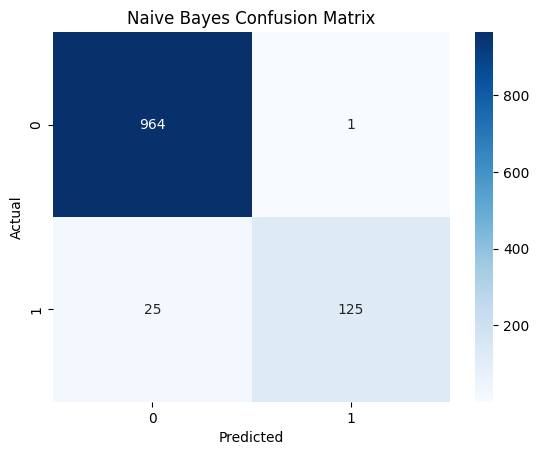

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example for Naive Bayes
plot_confusion_matrix(y_test, y_pred, "Naive Bayes")
